# Project 4: Cd-Aufnahme über die Nahrung bei Folsomia

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pal = sns.color_palette()
from scipy import stats
import pandas as pd
from copy import deepcopy
import pprint
pp = pprint.PrettyPrinter(indent=2)
import os
import pyarrow

current_dir = os.path.dirname(os.path.abspath(''))
project_directory = os.path.dirname(current_dir)

# automatische aktualisierung externer Python-Dateien
%load_ext autoreload
%autoreload 2 

# Einbindung zusätzlicher Funktionen 
from utils import * 
from ModelFitting import *
from mempyDEB.DEBODE.simulators import *
from mempyDEB.DEBODE.defaultparams import *

## Start by fitting the model to control data

In [3]:
from DEBfitting_Folsomia import *
data = load_data()
data.head()

t_day  length_mm  C_F  T_cels         S
85      0      0.609    0      20  1.420620
86      2      0.723    0      20  1.999511
87      4      0.857    0      20  2.805551
88      7      1.019    0      20  3.960986
89      9      1.095    0      20  4.571232

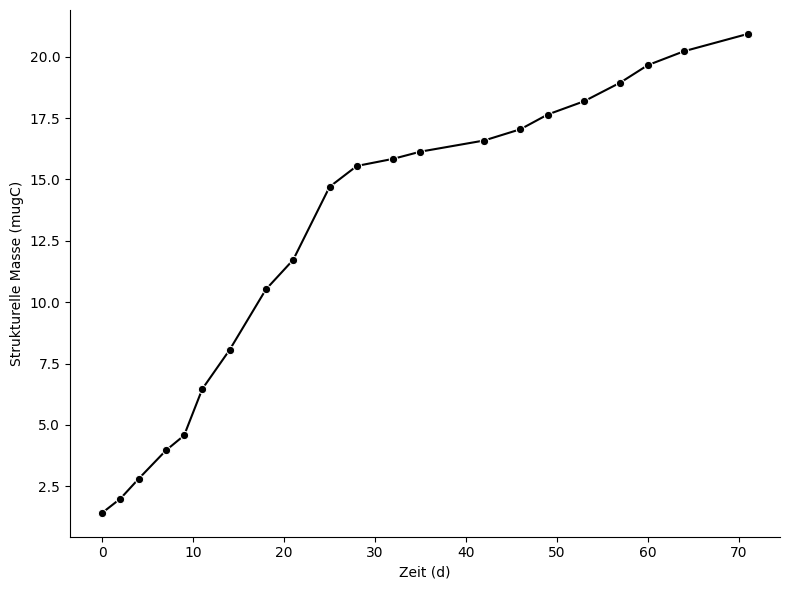

In [4]:
_ = plot_data(data)

0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.

c:\Users\Felix\projects\mem25\project\mempyDEB\DEBfitting_Folsomia.py:89: RuntimeWarning: invalid value encountered in scalar power
  p.spc['Idot_max_rel_emb'] *= zoom_factor_theta**(1/3)


0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


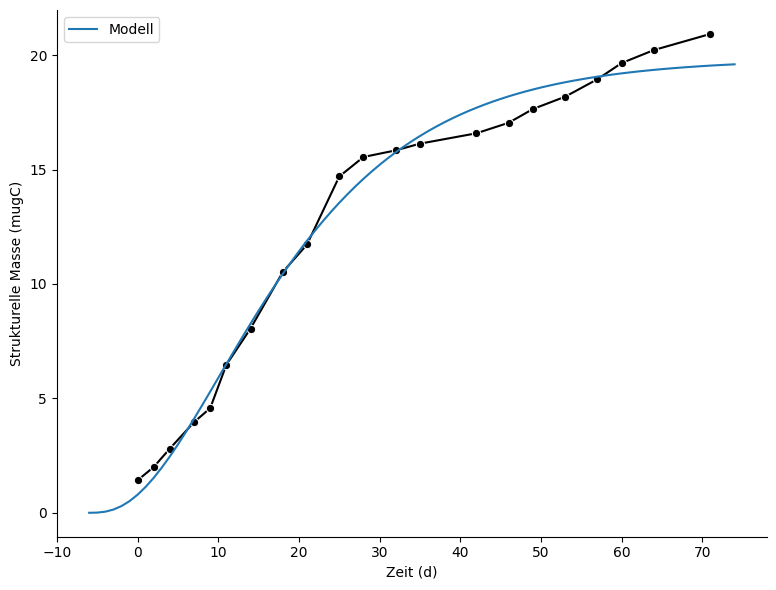

In [5]:
f = fit_model()

0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.

c:\Users\Felix\projects\mem25\project\mempyDEB\DEBfitting_Folsomia.py:89: RuntimeWarning: invalid value encountered in scalar power
  p.spc['Idot_max_rel_emb'] *= zoom_factor_theta**(1/3)


0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


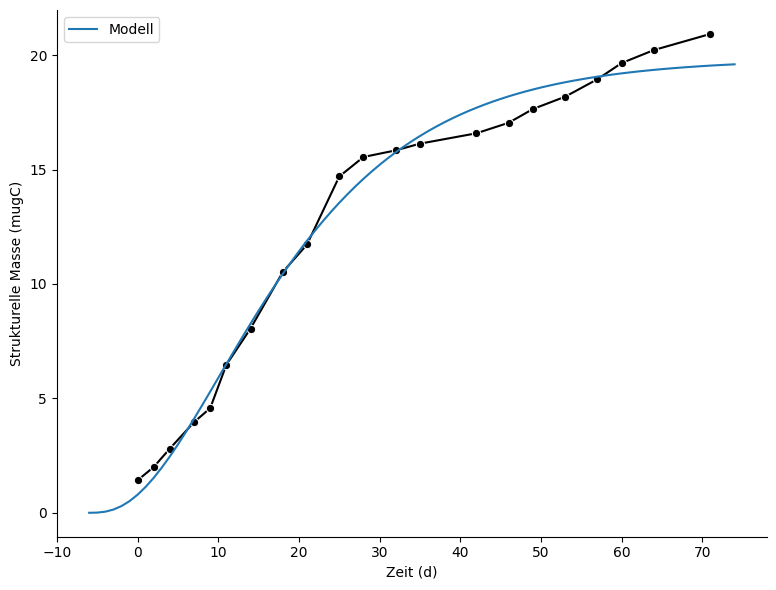

In [6]:
def fit_model_2params():
    """
    DEB-Modellkalibrierung mit zwei Parametern.
    """

    # Definition des ModelFit - Objektes wie zuvor
    f = setup_modelfit() 
    
    # wir müssen hier lediglich den initial guess anpassen
    f.intguess = { 
        'Idot_max_rel' : f.defaultparams.spc['Idot_max_rel'], 
        'eta_AS_0' : f.defaultparams.spc['eta_AS_0'],
        #'k_M_0' : f.defaultparams.spc['k_M_0']
    }

    # am restlichen Code ändert sich ersmtal nichts

    f.run_optimization()

    print(f"Estimated parameter values: {f.p_opt}")

    # simulate optimized parameters, 

    p = deepcopy(f.defaultparams)
    p.spc.update(f.p_opt)  

    sim_opt = f.simulator(p.spc)

    # plot data + retrodiction

    fig, ax = plot_data(f.data)

    sns.lineplot(sim_opt, x = 't_day', y = 'S', ax = ax, label = "Modell")
    #sns.lineplot(sim_opt, x = 't_day', y = 'cum_repro', ax = ax[1])

    #ax[1].legend()

    return f
 
f_2params = fit_model_2params()

control_fitted_params = f_2params.p_opt


In [6]:
control_fitted_params

{'Idot_max_rel': np.float64(4.5483797877675745),
 'eta_AS_0': np.float64(0.40638832287776183)}

### Bayesian Inference

In [7]:
# f.define_lognorm_prior()
# f.run_bayesian_inference(
#     popsize = 35,
#     max_total_nr_simulations = 1_000)

In [8]:
# f.retrodict()
# fig,ax = plot_data(f.data)

# for df in f.retrodictions:
    
#     sns.lineplot(df, x = 't_day', y = 'S', ax = ax, alpha = .2, color = 'gray')

## use control fit to fit TKTD model

In [7]:
from TKTDFitting_Folsomia import *

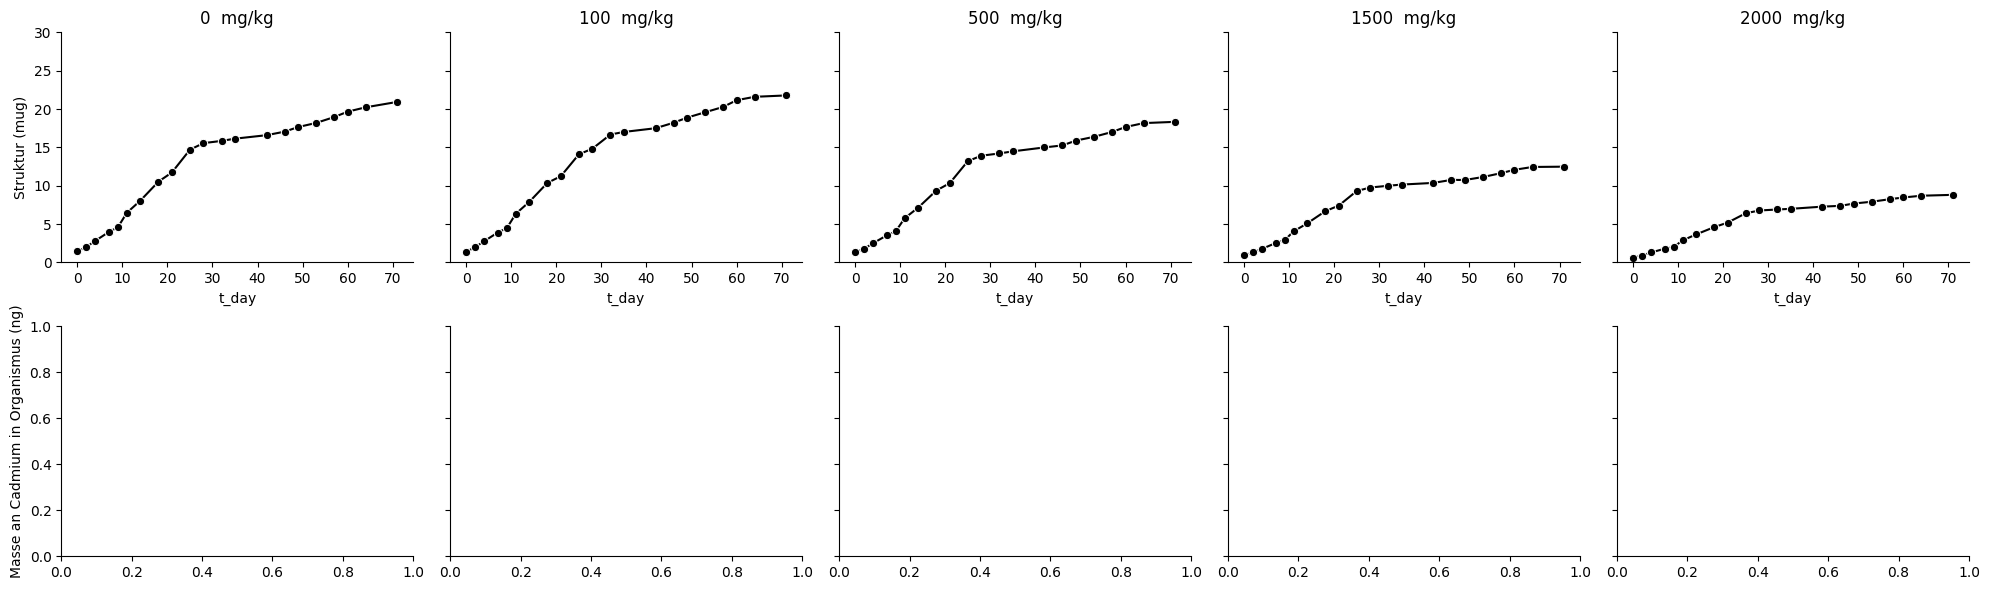

In [24]:
data = load_data()
fig, ax = plot_data(data)


0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.

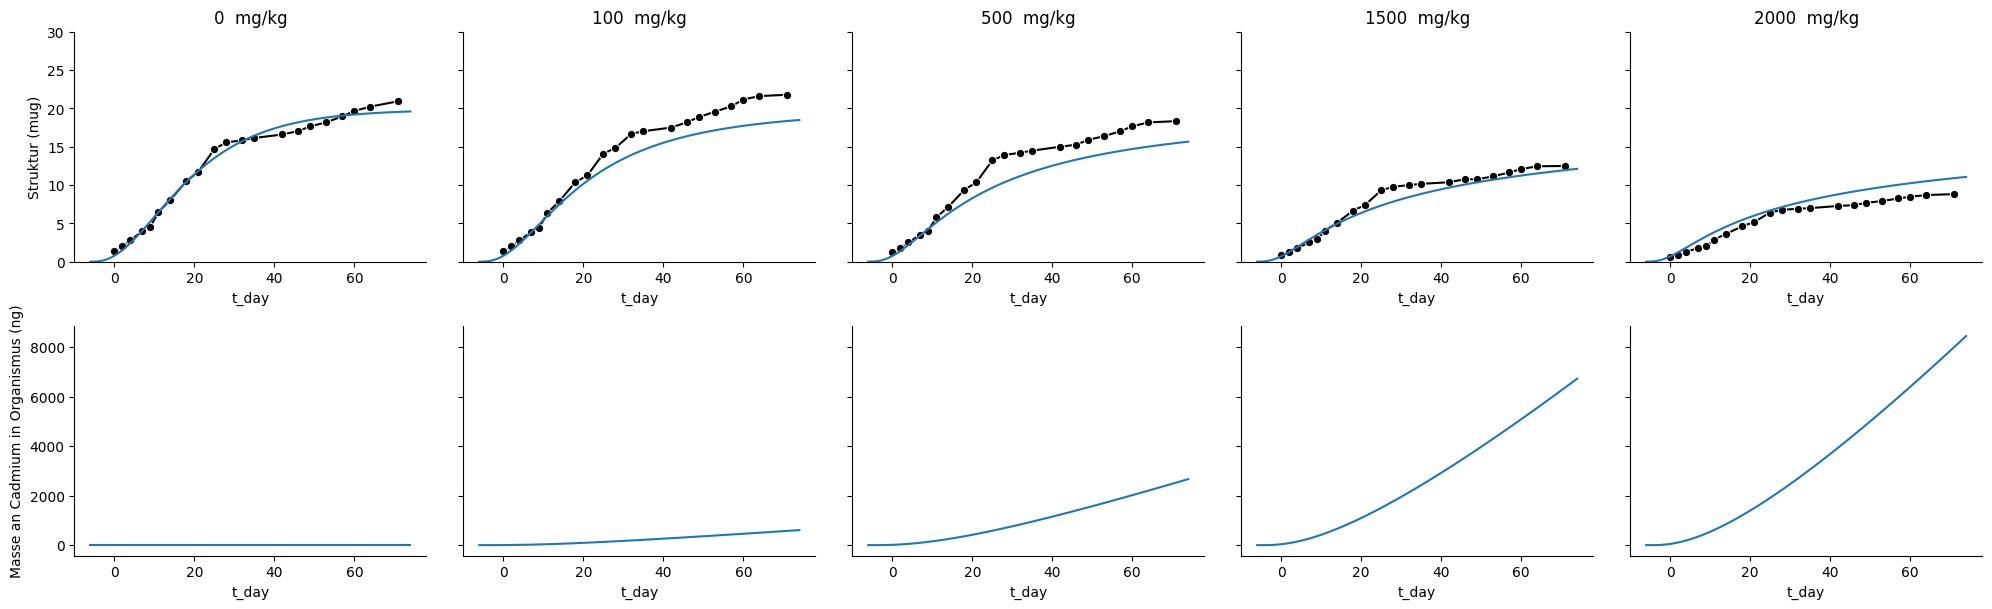

In [23]:
f = setup_modelfit(pmoa = 'G')
f.defaultparams.spc.update(control_fitted_params)

f.intguess = { 
    'ED50_j' : 1000,
    'beta_j' : 0.5,
    #'kD_j' : 0.5
    }

sim = f.run_optimization(
    #bounds = [(.001,1), (.001,1),],
    options={'maxiter' : 10}) # führe Kalibrierung mittels lokaler Optimisierung durch

print(f"Estimated parameter values: {f.p_opt}")
# Simulation optimisierter Parameter
p = deepcopy(f.defaultparams)
p.spc.update(f.p_opt)  
sim_opt = f.simulator(p.spc)

# Visual predictive check

fig, ax = plot_data(f.data)
ax = plot_sim(ax, sim_opt)

0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 

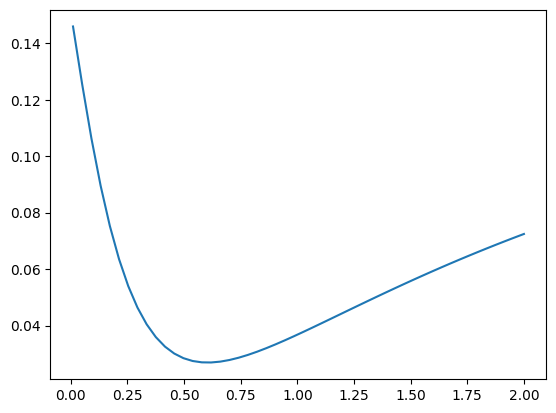

In [ ]:
# x = np.geomspace(1, np.median(EXPOSURES))
x = np.linspace(0.01, 2)
arr = []
f = setup_modelfit()
f.defaultparams.spc.update(control_fitted_params)
for i in x:
    f.intguess = {
            'ED50_j' : i,
            'beta_j' : i,
            'kD_j' : i,
            }
    sim = f.simulator(f.intguess)
    arr.append(f.loss(sim, f.data))

print(arr)
fig, ax = plt.subplots()
ax.plot(x, arr)

In [ ]:
f_test = fit_model()

0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.

KeyboardInterrupt: 

In [41]:
sim_opt = sim_opt.assign(cd_conc = lambda df : (df.Cd_in * 1e-3) / df.S)
#sim_opt.to_clipboard()
sim_opt

t_day   C_W  level_2          S          R         X_emb              X  \
0       -6     0        0   0.000010   0.000000  9.478447e-01    3596.296296   
1       -6   100       81   0.000010   0.000000  9.478447e-01    3596.296296   
2       -6   500      162   0.000010   0.000000  9.478447e-01    3596.296296   
3       -6  1500      243   0.000010   0.000000  9.478447e-01    3596.296296   
4       -6  2000      324   0.000010   0.000000  9.478447e-01    3596.296296   
..     ...   ...      ...        ...        ...           ...            ...   
400     74     0       80  19.590472  49.991863 -4.437310e-05  279702.241574   
401     74   100      161  18.476773  43.579080 -5.360577e-09  279821.036240   
402     74   500      242  15.649576  28.149443 -1.144823e-06  280039.382873   
403     74  1500      323  12.106231   0.000000 -1.556485e-07  280295.444572   
404     74  2000      404  11.052740   0.000000 -2.117067e-06  280373.405610   

           Cd_in  cum_repro      S_ref      R_ref  X_emb_ref          X_ref  \
0       0.000000        0.0   0.000010   0.000000   0.947845    3596.296296   
1       0.000000       51.0   0.000010   0.000000   0.947845    3596.296296   
2       0.000000       44.0   0.000010   0.000000   0.947845    3596.296296   
3       0.000000       28.0   0.000010   0.000000   0.947845    3596.296296   
4       0.000000        0.0   0.000010   0.000000   0.947845    3596.296296   
..           ...        ...        ...        ...        ...            ...   
400     0.000000       50.0  19.590472  49.991863  -0.000044  279702.241574   
401   606.643389       43.0  19.590472  49.991863  -0.000044  279702.241574   
402  2669.298828       27.0  19.590472  49.991863  -0.000044  279702.241574   
403  6727.606384        0.0  19.590472  49.991863  -0.000044  279702.241574   
404  8450.352963        0.0  19.590472  49.991863  -0.000044  279702.241574   

     Cd_in_ref  C_W_ref  cum_repro_ref       y_S   cd_conc  
0          0.0        0            0.0  1.000000  0.000000  
1          0.0        0            0.0  1.000000  0.000000  
2          0.0        0            0.0  1.000000  0.000000  
3          0.0        0            0.0  1.000000  0.000000  
4          0.0        0            0.0  1.000000  0.000000  
..         ...      ...            ...       ...       ...  
400        0.0        0           50.0  1.000000  0.000000  
401        0.0        0           50.0  0.943151  0.032833  
402        0.0        0           50.0  0.798836  0.170567  
403        0.0        0           50.0  0.617965  0.555714  
404        0.0        0           50.0  0.564190  0.764548  

[405 rows x 18 columns]

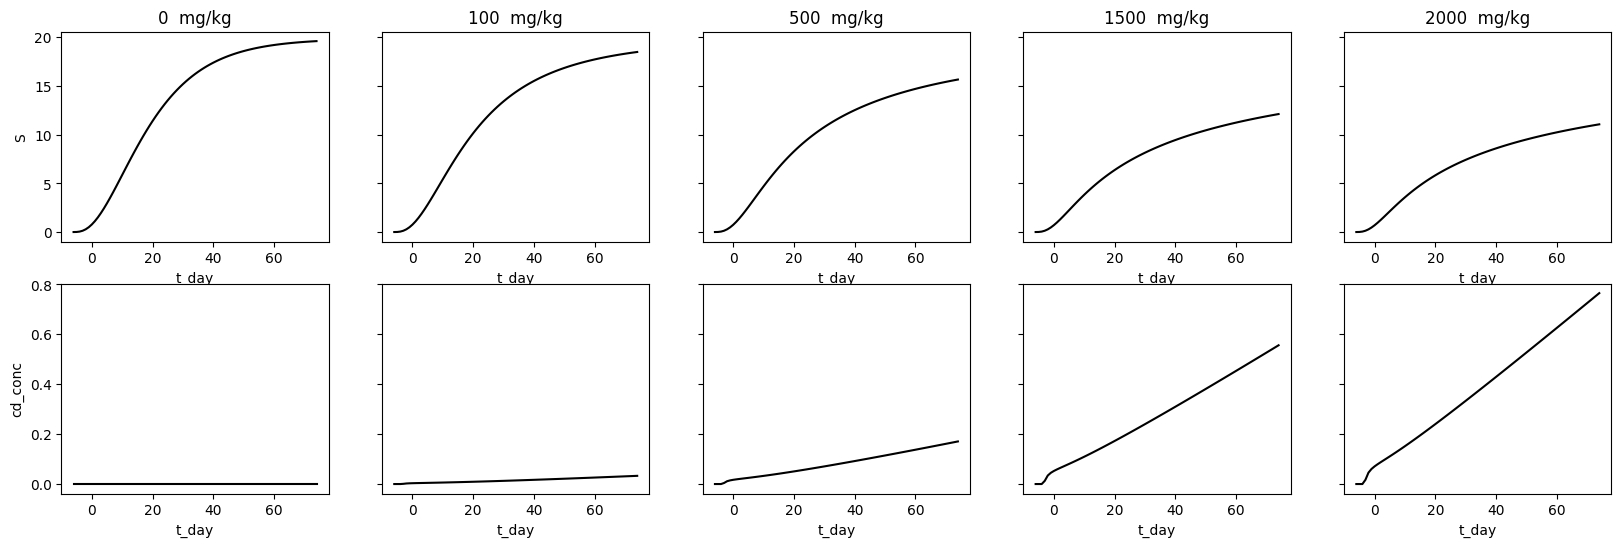

In [ ]:
fig, ax = plt.subplots(ncols = 5, nrows=2, figsize = (20,6), sharey = 'row')

for (i,C_W) in enumerate(sim_opt.C_W.unique()):

    ax[0,i].set(title = f'{C_W}  mg/kg')
    obs = sim_opt.loc[lambda df : df.C_W==C_W]
    
    sns.lineplot(obs, x = 't_day', y = 'S', ax = ax[0,i], color = 'black')
    sns.lineplot(obs, x = 't_day', y = 'cd_conc', ax = ax[1,i], color = 'black')
    

## trying out different PMoA

## fitting different levels of Cd-exposition from food ingestion/assimilation